# Two-Way ANOVA Classification - Grazers

This notebook is based on the [Statistical Sleuth](https://www.amazon.com/Statistical-Sleuth-Course-Methods-Analysis/dp/1133490670/ref=sr_1_1?crid=X1BDAP79JMTV&keywords=statistical+sleuth+3rd+edition&qid=1558765284&s=gateway&sprefix=statistical+sleu%2Caps%2C202&sr=8-1) __Chapter 13: The Analysis of Variance for Two-Way Classification__ based on the case study Seaweed Grazers

## Case Study: Intertidal Seaweed Grazers—A Randomized Experiment

> The grazers were limpets (L), small ﬁshes (f ), and large ﬁshes (F). A plot was taken to be a square rock surface, 100 cm on each side. Each plot received one of six treatments, named here by which grazers were allowed access:
* LfF: All three grazers were allowed access. 
* fF: Limpets were excluded by surrounding the plot with caustic paint.
* Lf: Large ﬁsh were excluded by covering the plot with a coarse net. 
* f: Limpets and large ﬁsh were excluded. 
* L: Small and large ﬁsh were excluded by covering the plot with a ﬁne net. 
* C: Control: limpets, small ﬁsh, and large ﬁsh were all excluded.


> Key Note on design: 
1. Each block is divided into twelve plots 
2. treatments are randomly assigned to plot
3. 2 plots per treatmetn within eahc block

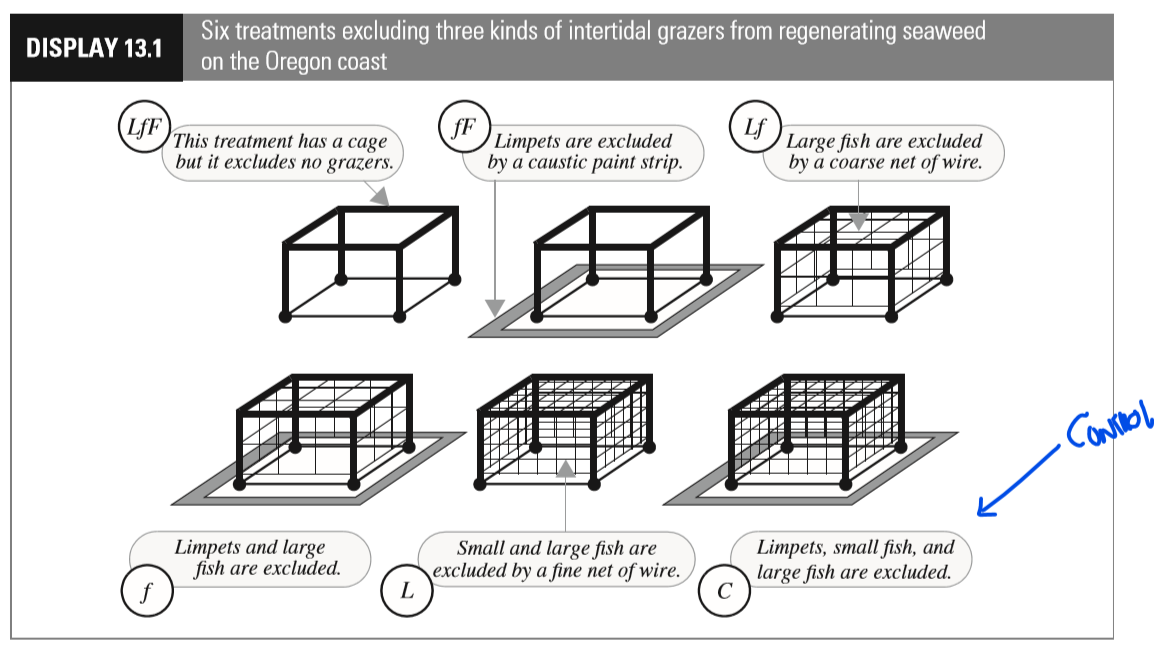



### Imports

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("./data/case1301.csv")
df.head()

,Cover,Block,Treat
0,14,B1,CONTROL
1,23,B1,CONTROL
2,22,B2,CONTROL
3,35,B2,CONTROL
4,67,B3,CONTROL


#### Factors and Levels

There are 2 differnet factor involved in this experiment with multiple levels:

In [10]:
print("# of Unique Blocks (tidal zones): ", len(df.Block.unique()), df.Block.unique())
print("# of Unique Treatment: ", len(df.Treat.unique()), df.Treat.unique())

# of Unique Blocks (tidal zones):  8 ['B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8']
# of Unique Treatment:  6 ['CONTROL' 'L' 'f' 'Lf' 'fF' 'LfF']


### Reserach Questions
> 1. Which grazer consumes the most seaweed?
2. Do the different grazers impact each other?
3. Are grazing effects similar in all habitats?


## Exploratory Data Analysis (EDA)
To get started we perform some high level summary statistics and visualizations

In [11]:
df.describe()

,Cover
count,96.000000
mean,28.625000
std,23.631491
min,1.000000
25%,9.000000
50%,22.500000
75%,42.250000
max,95.000000


In [25]:
from sklearn.preprocessing import LabelEncoder
data = df.apply(LabelEncoder().fit_transform)

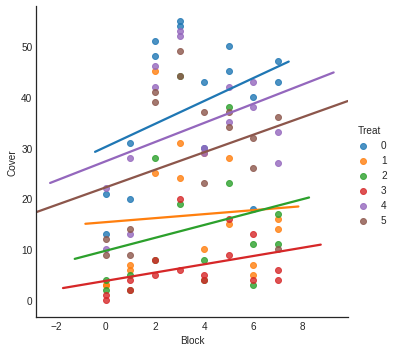

In [26]:
sns.lmplot(x ='Block', y = 'Cover', data = data, hue = 'Treat', 
           ci = None)

As described in the text we will have to perfomr initial transofmraiton, specifically a _logit transformation_.

![](https://i2.wp.com/taf-website-backup.s3.amazonaws.com/logit.png?resize=257%2C43)